Čte data stažená z webu
  https://data.europa.eu/euodp/cs/data/dataset/covid-19-coronavirus-data

Ukázka výpočtu klouzavého průměru, čtení ze souboru, práce s poli a elementární konverze typů

Záměrně nepoužíváme knihovnu pro cteni CSV dat ani numpy

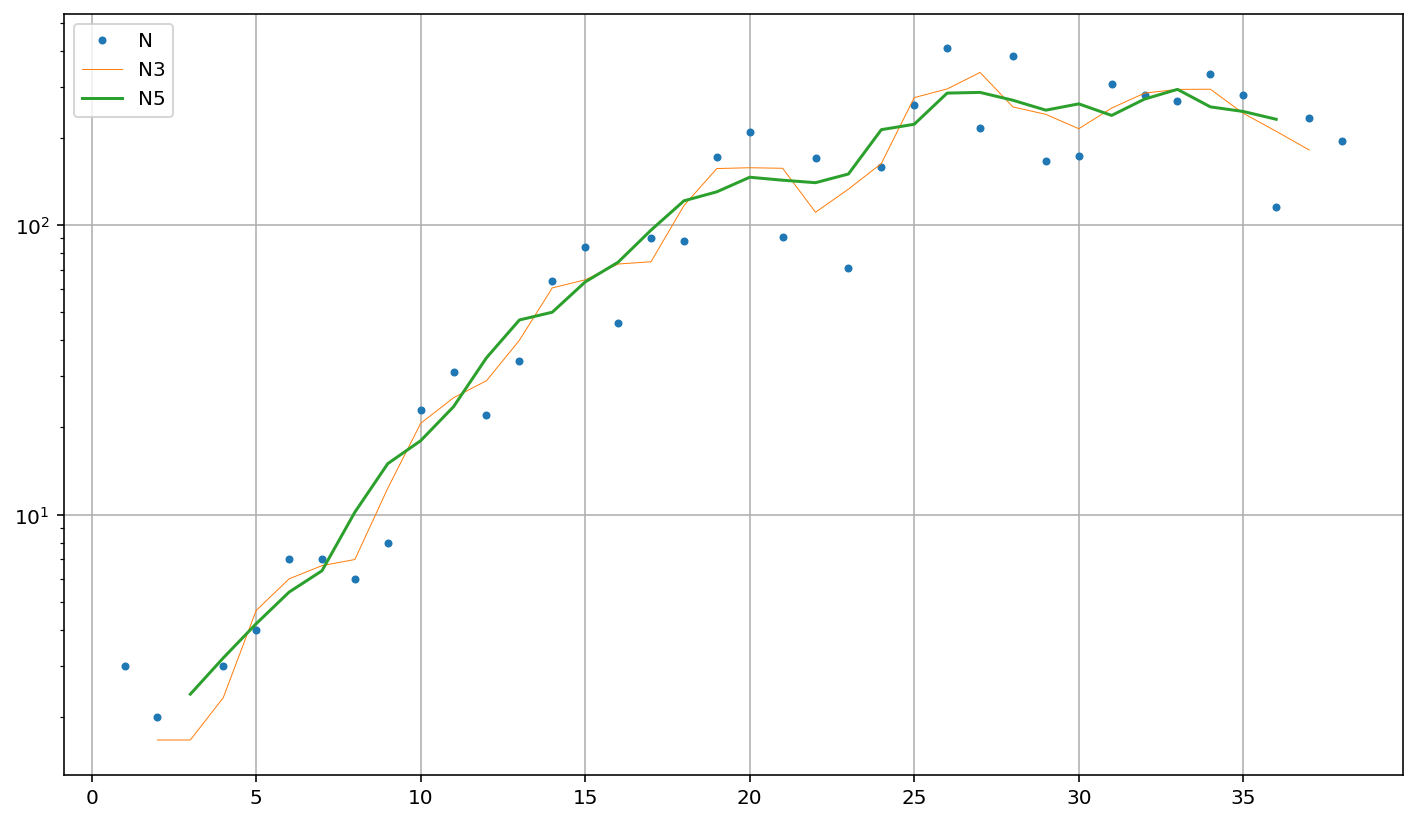

In [3]:
from datetime import date

with open('data.csv','r') as vstup: 
    vstup.readline()                # přeskočíme hlavičku

    den0 = date(2020,3,1)

    T = []
    N = []

    for line in vstup:
        casti = line.split(',')
        if casti[6]=='Czechia':
            den, mesic, rok, pocet = [int(s) for s in casti[1:5] ]
            t = (date(rok, mesic, den) - den0).days

            if t>0:
                T.append(t)
                N.append(pocet)


import matplotlib.pyplot as plt

n = len(N)
# přímá konstrukce seznamu
N3 = [ (N[k-1]+N[k]+N[k+1])/3 for k in range(1,n-1) ]
# postupná konstrukce seznamu
N5 = []
for k in range(2,n-2):
    N5.append((N[k-2]+N[k-1]+N[k]+N[k+1]+N[k+2])/5);

# logaritmický graf
plt.yscale("log")
plt.plot(T,N,'.',label='N')
plt.plot(T[1:-1],N3,label='N3',linewidth=0.5)
plt.plot(T[2:-2],N5,label='N5')
plt.legend(loc='upper left')
plt.grid()
plt.show()

